# Predicting the Yellow Cab Drivers Pay

We fit a LinearRegression model to predict the yellow cab drivers pay.

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('cleaned_taxi_data.csv')

In [26]:
df.head()

,Unnamed: 0,trip_distance,time_difference,drivers_pay,PU_hour
0,0,1.5,400.0,8.65,0
1,1,2.6,1152.0,15.00,0
2,7,1.3,429.0,7.75,0
3,8,3.7,818.0,17.20,0
4,9,2.1,720.0,11.70,0


In [27]:
X0 = df[['trip_distance','time_difference','drivers_pay','PU_hour']]

In [28]:
X0.head()

,trip_distance,time_difference,drivers_pay,PU_hour
0,1.5,400.0,8.65,0
1,2.6,1152.0,15.00,0
2,1.3,429.0,7.75,0
3,3.7,818.0,17.20,0
4,2.1,720.0,11.70,0


In [29]:
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7606168 entries, 0 to 7606167
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   trip_distance    float64
 1   time_difference  float64
 2   drivers_pay      float64
 3   PU_hour          int64  
dtypes: float64(3), int64(1)
memory usage: 232.1 MB


We try to predict the *drivers_pay* using the *trip_distance* and the *time_difference*. *time_difference* is the time it took for the trip.

In [30]:
X = X0[['trip_distance','time_difference']]
Y = X0[['drivers_pay']]

In [31]:
X.head()

,trip_distance,time_difference
0,1.5,400.0
1,2.6,1152.0
2,1.3,429.0
3,3.7,818.0
4,2.1,720.0


In [32]:
Y.head()

,drivers_pay
0,8.65
1,15.00
2,7.75
3,17.20
4,11.70


In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)

In [34]:
regr = LinearRegression()

In [35]:
regr.fit(X_train,Y_train)

LinearRegression()

In [36]:
Y_hat = regr.predict(X_test)

In [37]:
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_hat))
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_hat))

Coefficients: 
 [[3.05565197e+00 4.14695269e-05]]
Mean squared error: 170273.82
Coefficient of determination: 0.00


It is noticed that the Mean Squared Error is very high and the Coefficient of Determination is *0*. Which indicates that the *drivers_pay* is not predictable by the used predictors in general.

Therefore we take a different approach. We try to check whether there is a correlation when the data is considered hour by hour. The analysis is as follows.

In [38]:
def hourly_correlation(X_hour):
    X = X_hour[['trip_distance','time_difference']]
    Y = X_hour[['drivers_pay']]
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
    
    regr = LinearRegression()
    regr.fit(X_train,Y_train)
    
    Y_hat = regr.predict(X_test)
    
    return mean_squared_error(Y_test, Y_hat),r2_score(Y_test, Y_hat)

In [39]:
X1 = df[df.PU_hour == 0]
mse,r2 = hourly_correlation(X1)
print('Mean squared error: %.2f'
      % mse)
print('Coefficient of determination: %.2f'
      % r2)


Mean squared error: 24.37
Coefficient of determination: 0.86


In [40]:
mse_list = []
r2_list = []
hour = []

for i in range(24):
    X_hour = df[df.PU_hour == i]
    mse,r2 = hourly_correlation(X_hour)
    
    mse_list.append(mse)
    r2_list.append(r2)
    hour.append(i)

In [41]:
print(hour)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


## Analysis of the hourly Mean Squared Error

From the bar plot we can observe that the variance (MSE) of the **drivers pay** is exceptionally high during the 13th hour of the day. This may be due to the fact that people going out for lunch during this hour. This leads to increased demand which can be levered to ask for higher rates.

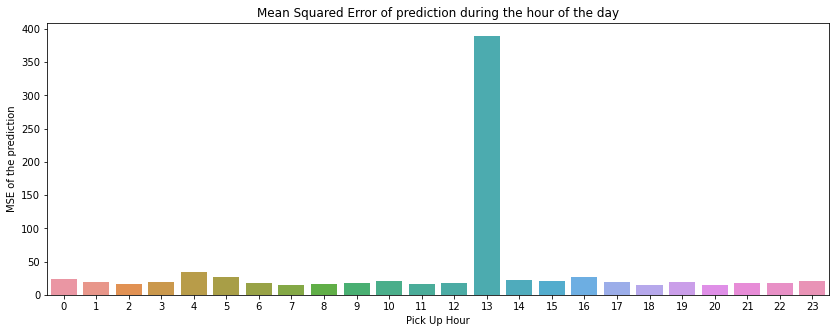

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , mse_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('MSE of the prediction')
_ = ax.set_title('Mean Squared Error of prediction during the hour of the day')

### Analysis of the hourly Coffecient of Determination

Similar to the analysis of MSE we can see the same outlying behavior during *13th* hour in *r2_score* as well. During the all the other hours *r2_score* is high as well as uniformly distributed. We can fairly conclude that with the exception of the *13th* hour the pay rate can be predicted based on the *trip_distance* and the *trip_time* with a high accuracy.

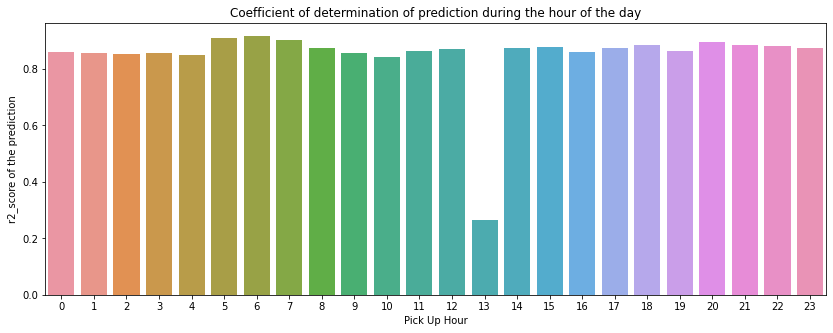

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , r2_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('r2_score of the prediction')
_ = ax.set_title('Coefficient of determination of prediction during the hour of the day')

## Now let's try to find the predictablility using RandomForestRegressor

In [45]:
def hourly_correlation_rfr(X_hour):
    X = X_hour[['trip_distance','time_difference']]
    Y = X_hour[['drivers_pay']]
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
    
    regr = RandomForestRegressor()
    regr.fit(X_train,Y_train)
    
    Y_hat = regr.predict(X_test)
    
    return mean_squared_error(Y_test, Y_hat),r2_score(Y_test, Y_hat)

In [48]:
X1 = df[df.PU_hour == 0]
mse,r2 = hourly_correlation_rfr(X1)
print('Mean squared error: %.2f'
      % mse)
print('Coefficient of determination: %.2f'
      % r2)

<ipython-input-45-94f1a70e678b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)


Mean squared error: 24.71
Coefficient of determination: 0.86


In [49]:
mse_list = []
r2_list = []
hour = []

for i in range(24):
    X_hour = df[df.PU_hour == i]
    mse,r2 = hourly_correlation_rfr(X_hour)
    
    mse_list.append(mse)
    r2_list.append(r2)
    hour.append(i)

<ipython-input-45-94f1a70e678b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-45-94f1a70e678b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-45-94f1a70e678b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-45-94f1a70e678b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-45-94f1a70e678b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

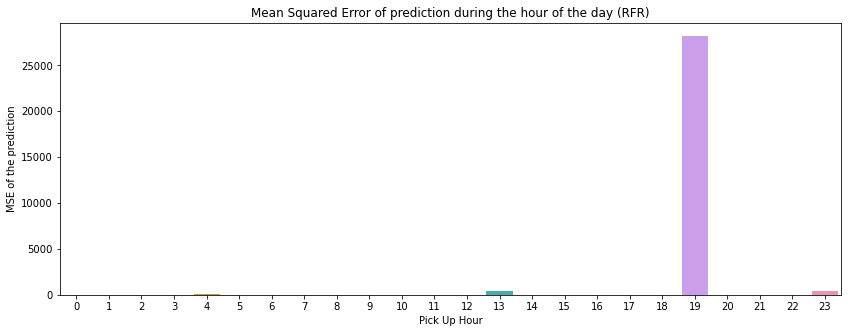

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , mse_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('MSE of the prediction')
_ = ax.set_title('Mean Squared Error of prediction during the hour of the day (RFR)')

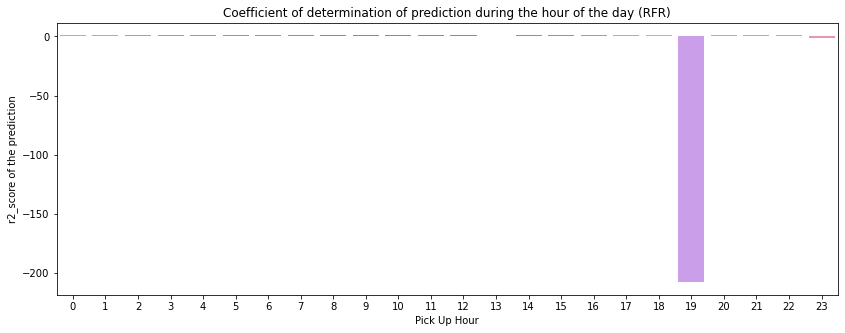

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , r2_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('r2_score of the prediction')
_ = ax.set_title('Coefficient of determination of prediction during the hour of the day (RFR)')

In [52]:
r2_list[0:19]

[0.8617217507543798,
 0.8528553152859415,
 0.8094156045824651,
 0.8482687726126564,
 0.7989132561715231,
 0.8988938627608898,
 0.9140022492076479,
 0.9119419813908991,
 0.911880601348245,
 0.9102611550715428,
 0.8965636196392603,
 0.8997499362219665,
 0.8981918360908059,
 0.26798257153819016,
 0.89063007269557,
 0.890772036233219,
 0.8823643971429538,
 0.8875159547273697,
 0.9017433891304657]

In [53]:
r2_list[19]

-208.09741958197483

In [54]:
r2_list[20:]

[0.9022989678522538,
 0.8808519546257938,
 0.8789980240079268,
 -1.3040631942267025]

In [55]:
def hourly_correlation_rfr_tuning(X_hour,num_estimators):
    X = X_hour[['trip_distance','time_difference']]
    Y = X_hour[['drivers_pay']]
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
    
    regr = RandomForestRegressor(n_estimators = num_estimators)
    regr.fit(X_train,Y_train)
    
    Y_hat = regr.predict(X_test)
    
    return mean_squared_error(Y_test, Y_hat),r2_score(Y_test, Y_hat)

In [57]:

mse_lst=[]
r2_lst = []
estimators_lst = [50,100,150,200,250,300]

for est_num in estimators_lst:
    X1 = df[df.PU_hour == 0]
    mse,r2 = hourly_correlation_rfr_tuning(X1,est_num)
    mse_lst.append(mse)
    r2_lst.append(r2)
    
    
print(mse_lst)
print(r2_lst)

<ipython-input-55-c944f65e1080>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-55-c944f65e1080>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-55-c944f65e1080>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-55-c944f65e1080>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train,Y_train)
<ipython-input-55-c944f65e1080>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[24.5790936588878, 24.286756478951155, 24.60666337849294, 24.289054043345587, 24.527735755119675, 24.46990054847894]
[0.8601225214696311, 0.8617861868666434, 0.8599656245996458, 0.8617731116280396, 0.8604147948211789, 0.8607439299385051]


### It seems that RandomForestReggressor is not doing a good job in predicting the pay rates.